<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/unit-1/notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black body radiation:

## Problem 1

1. Write python functions to compute the spectral radiance of a body for different frequencies, $\nu$, and different (absolute) temperatures, $T$, according to the Rayleigh-Jeans and the Planck laws.


2. Add a label indicating the UV side of the spectrum.


3. Now, make the plots of spectral radiance versus wavelength, also for both laws.


4. Repeat the plot adding markers to show the expectation values according to Wien's displacement law for a couple of temperature-wavelength pairs.

In [ ]:
# Import some libraries

import numpy as np
import matplotlib.pyplot as plt

# Import scipy.constants, which contains most physical constants
import scipy.constants as cte

### Rayleigh-Jeans law (classical equation):

$$B_{\lambda}= \frac{2ck_BT}{\lambda^4} $$

In [ ]:
# Fundamental constants
# Documentation: https://docs.scipy.org/doc/scipy/reference/constants.html

print(cte.c) # speed of light in m/s
print(cte.k) # Boltzmann constant in SI units J/K

299792458.0
1.380649e-23


In [ ]:
# Fix the black body temperature
t_b = 5000 # in K

# Fix constants
c = cte.c
kb = cte.k

# Vector for the wavelenghts
l_b = np.arange(1.e-9, 5000.e-9, 1.e-9) # in m

# Spectral radiance in SI units

def rayleigh(l_b, t_b):
  """
  This function computes the spectral radiance:
  Inputs: wavelenghts (l_b), temperature (t_b)
  Output: spectral radiance (B)
  """
  B_l = (2*c*kb*t_b)/(l_b**4)

  return B_l

In [ ]:
# Call the function for the Yaxis values
s_r = rayleigh(l_b, t_b)

print(l_b.shape, s_r.shape)

(4999,) (4999,)


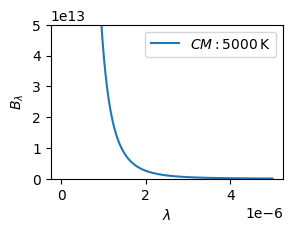

In [ ]:
# Plotting

plt.figure(figsize=(3,2))

plt.plot(l_b, s_r, label = r"$CM: 5000\,\rm K$")

plt.ylim(0, 5.e13)

plt.legend()

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$")

plt.show()

### Planck's law:

$$B_\lambda =\frac{2hc^2}{\lambda^5}\frac 1{ \exp\left(\frac{hc}{\lambda k_\mathrm B T}\right) - 1}$$

In [ ]:
# Define Planck constant
h = cte.h

print(h)

# Planck function:

def planck(l_b, t_b):
  """
  This is a function to compute the spectral radiance according to QM.
  Inputs: wavelenghts (l_b), temperature (t_b)
  Output: spectral radiance (B)
  """

  B_l = ((2*h*c**2)/(l_b**5))*((1)/(np.exp((h*c)/(l_b*kb*t_b)) - 1)) #spectral radiance in SI units

  return B_l # values that we want the function to output


6.62607015e-34


In [ ]:
# Call the function for the Yaxis values
s_r2 = planck(l_b, t_b)

print(l_b.shape, s_r2.shape)

(4999,) (4999,)


<ipython-input-12-bb367bd58840>:15: RuntimeWarning: overflow encountered in exp
  B_l = ((2*h*c**2)/(l_b**5))*((1)/(np.exp((h*c)/(l_b*kb*t_b)) - 1)) #spectral radiance in SI units


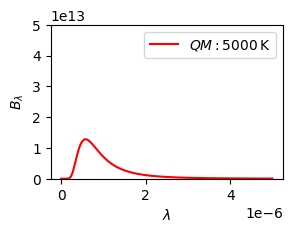

In [ ]:
# Plotting

plt.figure(figsize=(3,2))

plt.plot(l_b, s_r2, color = "red", label = r"$QM: 5000\,\rm K$")

plt.ylim(0, 5.e13)

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$")

plt.legend()

plt.show()

# Comparison between CM and QM:

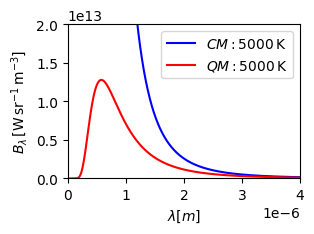

In [ ]:
# Plotting

plt.figure(figsize=(3,2))

plt.plot(l_b, s_r, color = "blue", label = r"$CM: 5000\,\rm K$")
plt.plot(l_b, s_r2, color = "red", label = r"$QM: 5000\,\rm K$")

plt.xlabel(r"$\lambda [m]$")
plt.ylabel(r"$B_{\lambda}\,\rm [W\,sr^{-1}\,m^{-3}]$") # 'r' is to access latex notation

plt.xlim(0, 4.e-6)
plt.ylim(0, 2.e13)

plt.legend()

plt.show()

# Wien's displacement:

$$\lambda_{\rm peak} = \frac{b}{T}$$

where: $b = 2.898\times 10^{-3}\,\rm K\,m$

In [ ]:
# Fix b

b = 2.898e-3

# Function for the displacement:

def wien(t_b):
  """
  Function to compute Wien's displacement
  """
  l_max = b/t_b

  return l_max

In [ ]:
# Call the function
l_m = wien(t_b)

print(t_b, l_m)

# Evaluate this using planck law

rad_lm = planck(l_m, t_b)

print(l_m, rad_lm)


5000 5.796e-07
5.796e-07 12798983170747.459


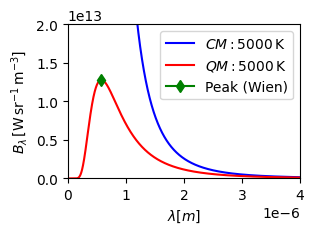

In [ ]:
# Add this pair to the plot

plt.figure(figsize=(3,2))

plt.plot(l_b, s_r, color = "blue", label = r"$CM: 5000\,\rm K$")
plt.plot(l_b, s_r2, color = "red", label = r"$QM: 5000\,\rm K$")
plt.plot(l_m, rad_lm, color = "green", marker = "d", label = "Peak (Wien)")

plt.xlabel(r"$\lambda [m]$")
plt.ylabel(r"$B_{\lambda}\,\rm [W\,sr^{-1}\,m^{-3}]$") # 'r' is to access latex notation

plt.xlim(0, 4.e-6)
plt.ylim(0, 2.e13)

plt.legend()

plt.show()

## Problem 2 (statistical distributions):

Imagine a room containing fourteen people, whose ages are as follows: one person aged 14, one person aged 15, three people aged 16, two people aged 22, two people aged 24, five people aged 25.

(a) Compute $<j>^2$ and $<j^2>$.

(b) Compute the $\sqrt{<j^2> - <j>^2}$

(c) Compute the standard deviation and compare with (b).

In [ ]:
sample = np.array([14,15,16,16,16,22,22,24,24,25,25,25,25,25])
print(sample)

[14 15 16 16 16 22 22 24 24 25 25 25 25 25]


(array([1., 1., 3., 0., 0., 0., 2., 0., 2., 5.]),
 array([13. , 14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. ]),
 [<matplotlib.patches.Polygon at 0x79d4b539e2f0>])

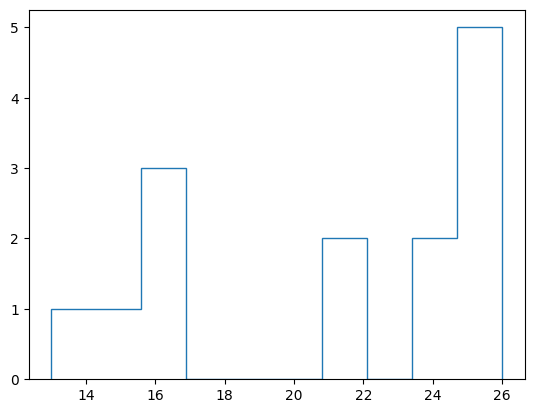

In [ ]:

plt.hist(sample, bins=10, range=(13,26), histtype='step')

### Average:

In [ ]:
av_sample = np.mean(sample)

print("average is =", av_sample)

average is = 21.0


### Average of the square:

In [ ]:
sqr_av_sample = np.mean(sample**2)

print("average is =", sqr_av_sample)

average is = 459.57142857142856


### Standard deviation with formula:

In [ ]:
sigma_sample = np.sqrt(sqr_av_sample - av_sample**2)

print("sigma is =", sigma_sample)

sigma is = 4.309458036856672


### Standard deviation with Numpy:

In [ ]:
std_sample = np.std(sample)

print("sigma is =", std_sample)

sigma is = 4.3094580368566735
